In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader import data

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

In [2]:
os.chdir('C:/Users/Niraj/Desktop/pixiu/archive')

In [3]:
df = pd.read_csv('2014_Financial_Data.csv')

In [4]:
df.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0618,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,0.0211,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.0257,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Columns: 225 entries, Unnamed: 0 to Class
dtypes: float64(222), int64(1), object(2)
memory usage: 6.5+ MB


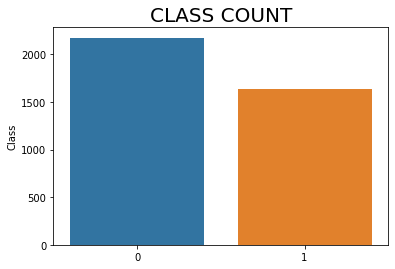

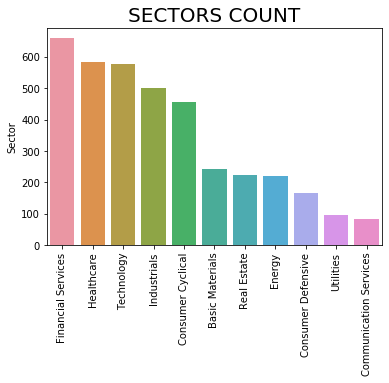

In [6]:
# Plot class distribution
df_class = df['Class'].value_counts()
sns.barplot(np.arange(len(df_class)), df_class)
plt.title('CLASS COUNT', fontsize=20)
plt.show()

# Plot sector distribution
df_sector = df['Sector'].value_counts()
sns.barplot(np.arange(len(df_sector)), df_sector)
plt.xticks(np.arange(len(df_sector)), df_sector.index.values.tolist(), rotation=90)
plt.title('SECTORS COUNT', fontsize=20)
plt.show()

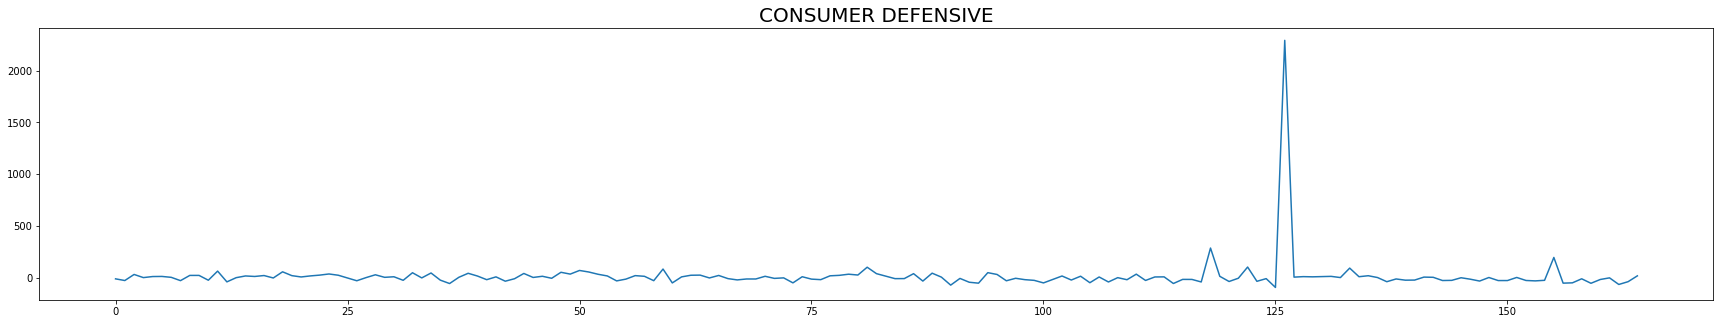

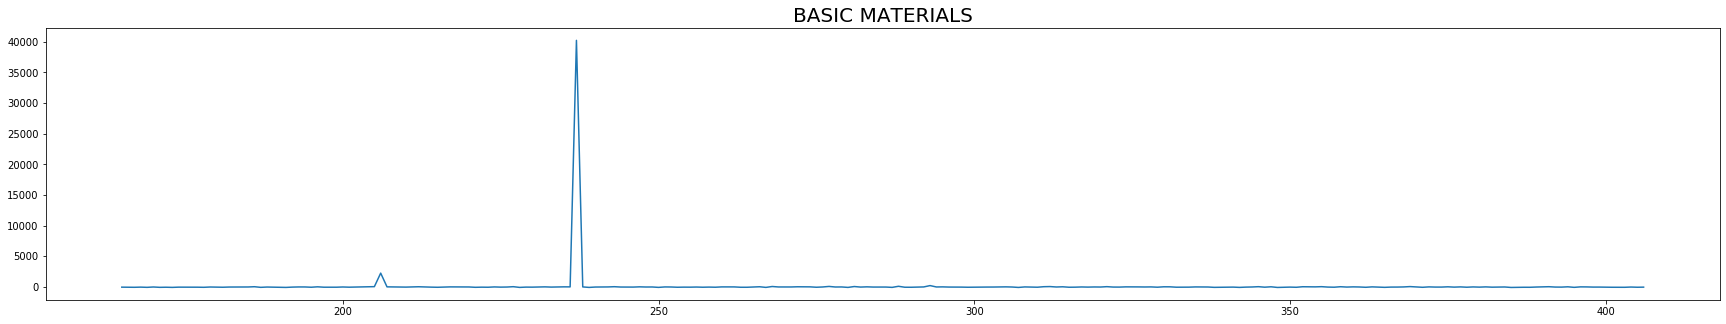

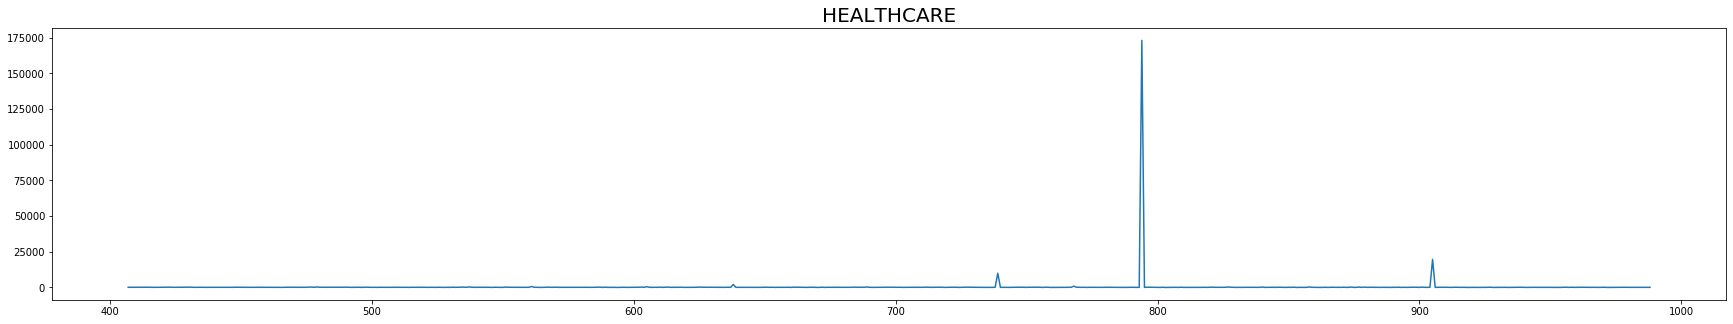

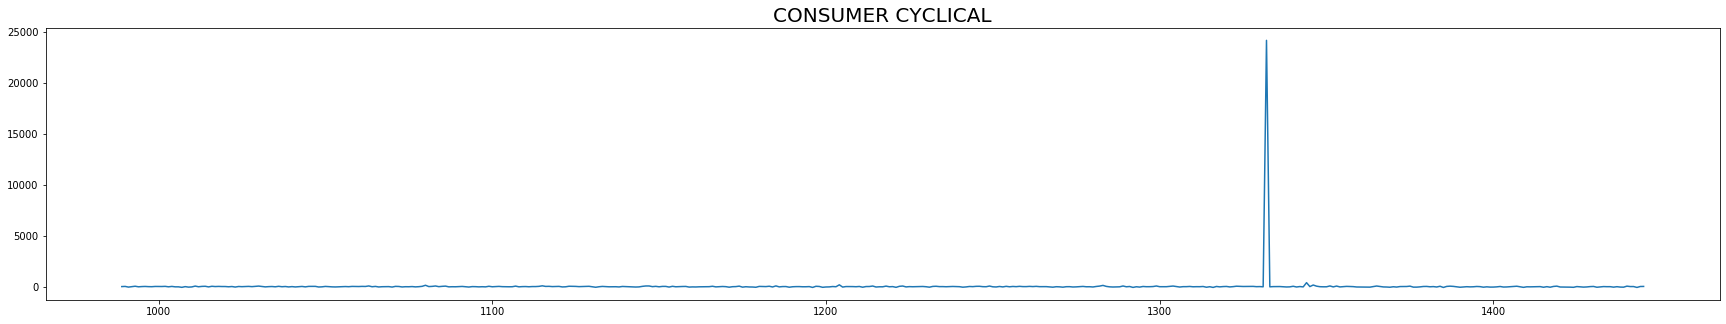

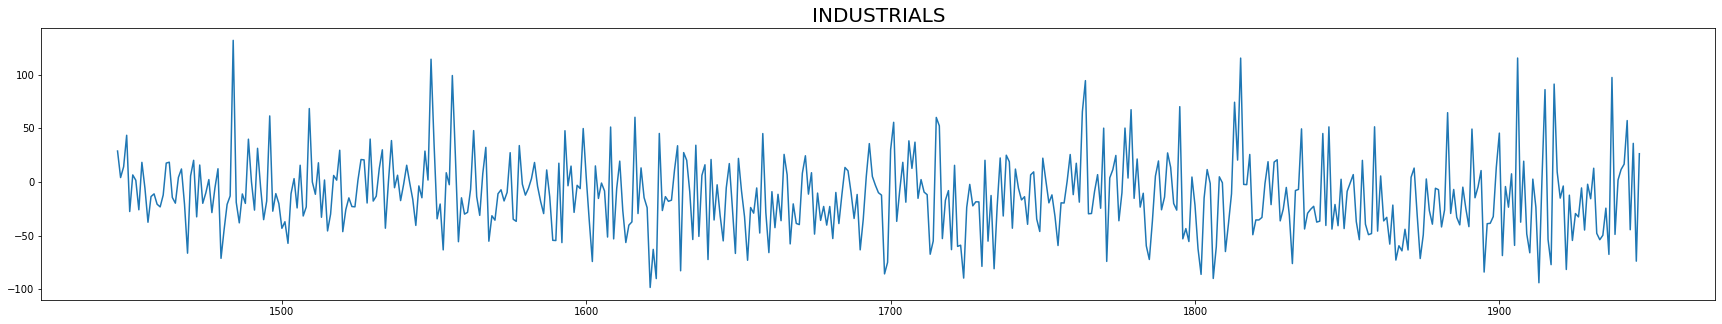

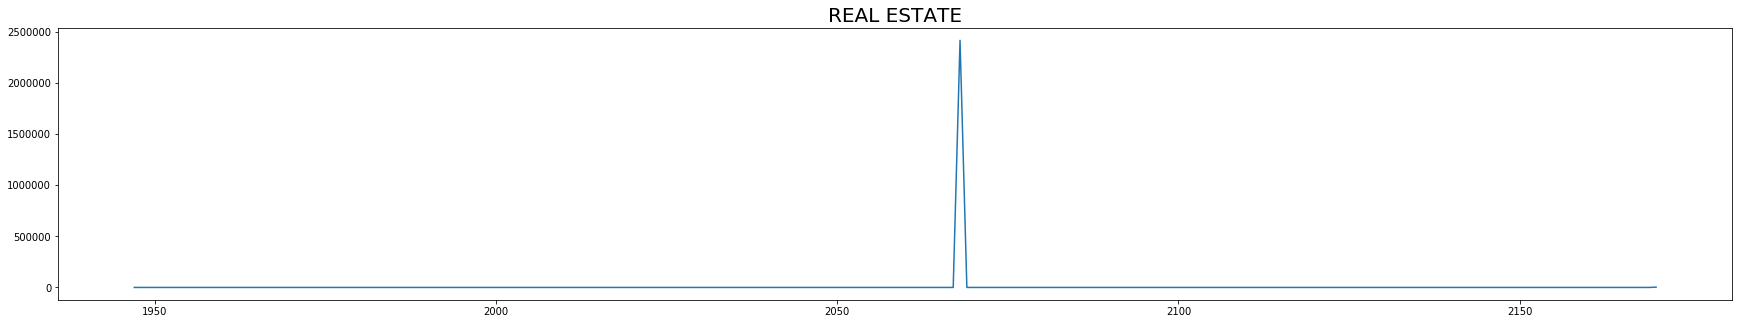

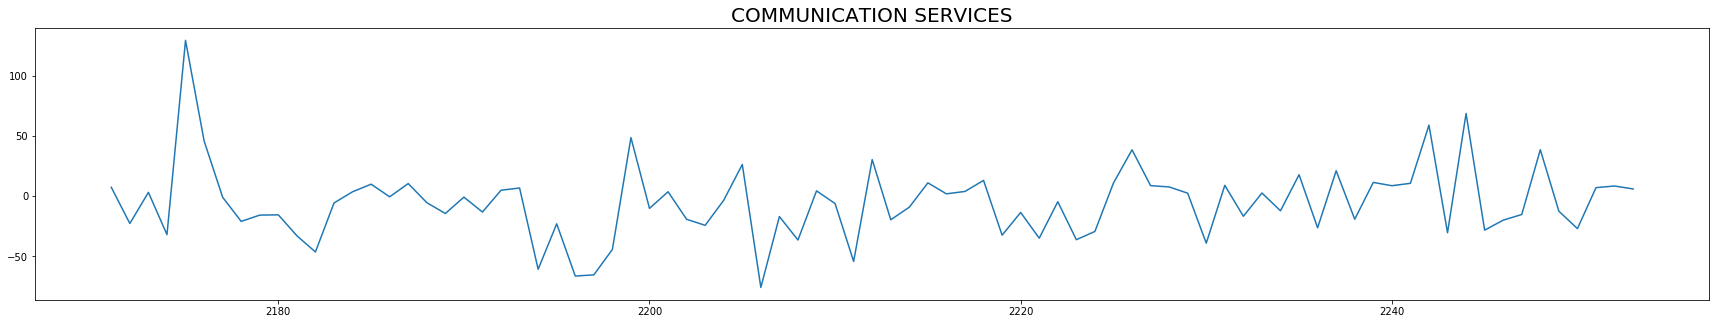

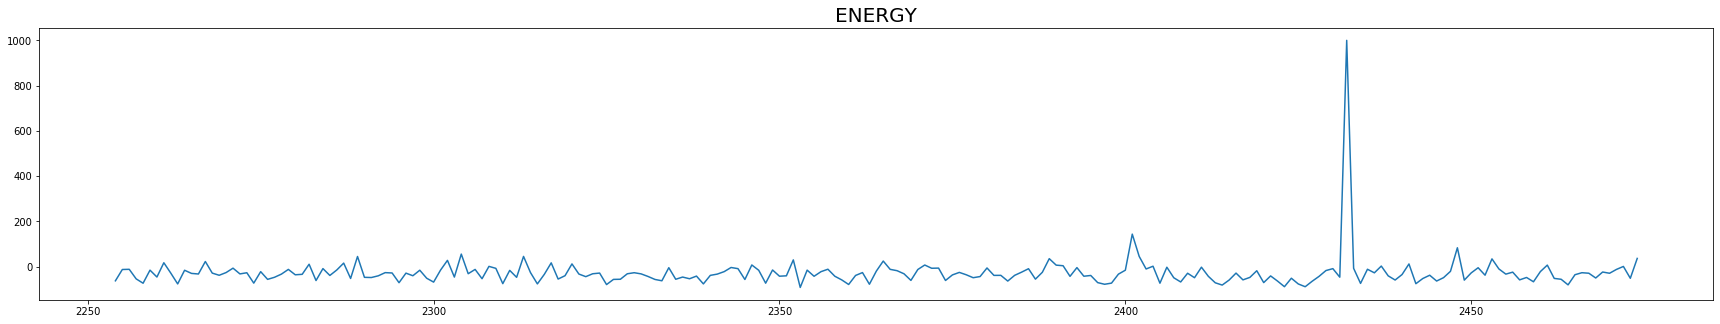

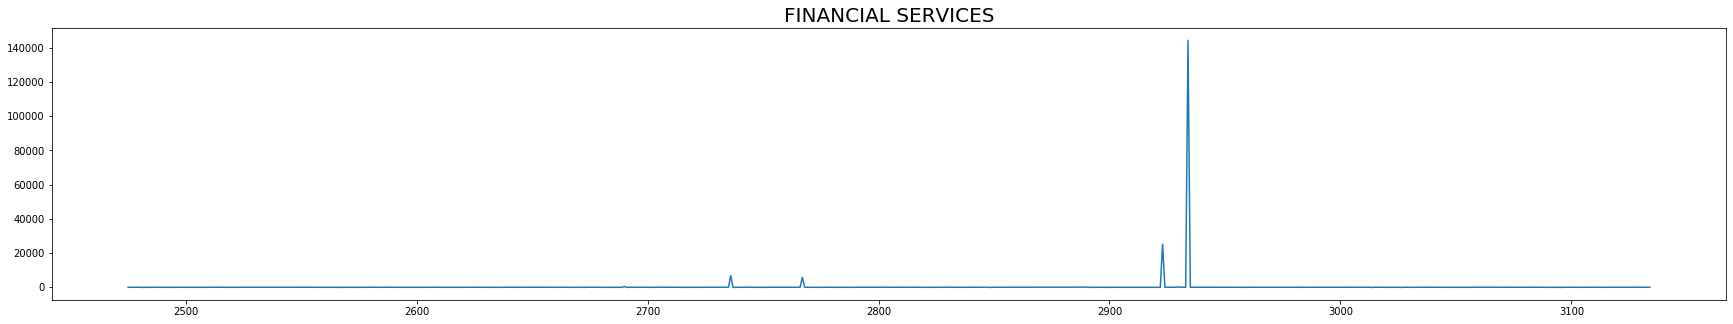

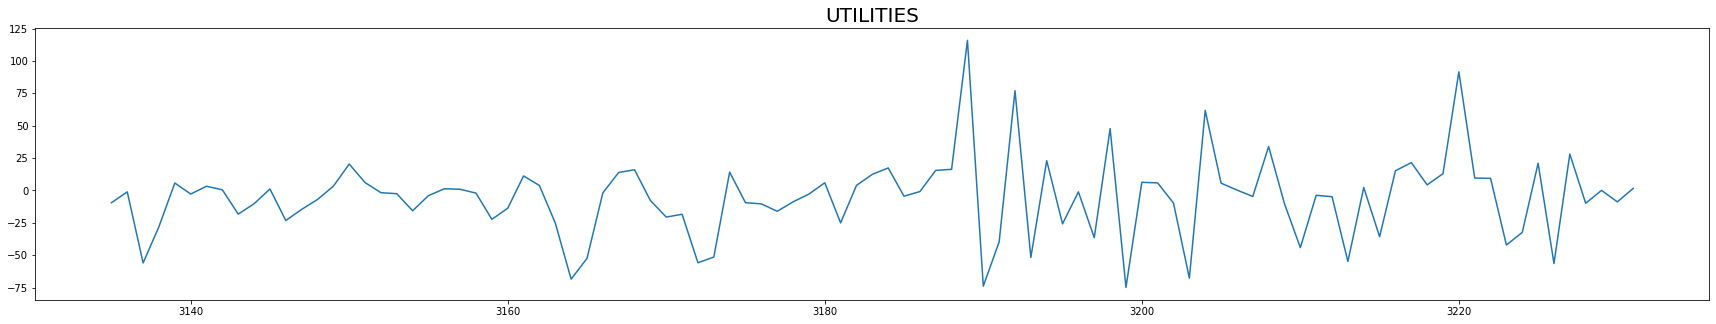

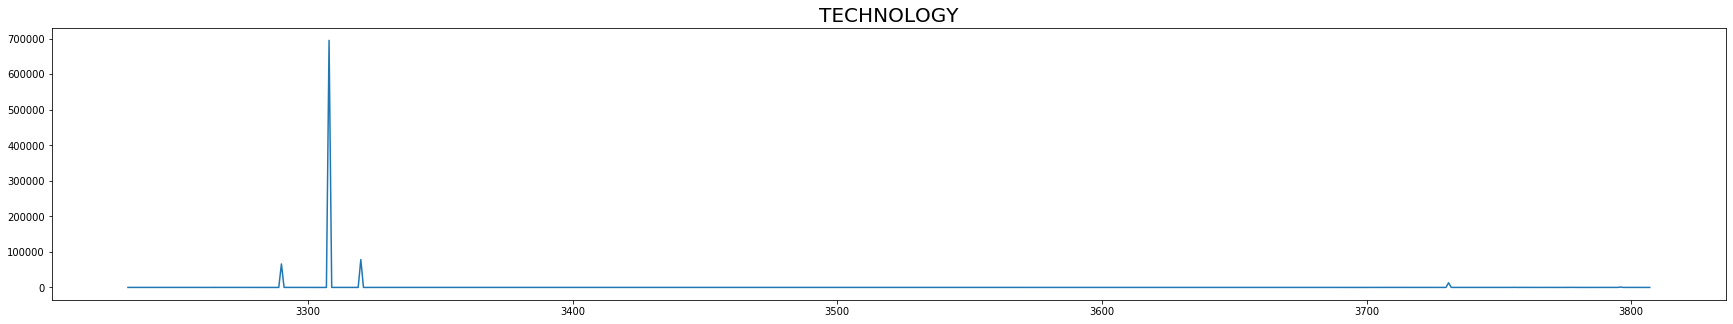

In [7]:
# Extract the columns in this step from the dataframe
df_ = df.loc[:, ['Sector', '2015 PRICE VAR [%]']]

# Get list of sectors
sector_list = df_['Sector'].unique()

# Plot the percent price variation for each sector
for sector in sector_list:
    
    temp = df_[df_['Sector'] == sector]

    plt.figure(figsize=(30,5))
    plt.plot(temp['2015 PRICE VAR [%]'])
    plt.title(sector.upper(), fontsize=20)
    plt.show()
    

In [8]:
# Get stocks that increased more than 500%
gain = 500
top_gainers = df_[df_['2015 PRICE VAR [%]'] >= gain]
top_gainers = top_gainers['2015 PRICE VAR [%]'].sort_values(ascending=False)
print(f'{len(top_gainers)} STOCKS with more than {gain}% gain.')
print()

# Set
date_start = '01-01-2015'
date_end = '12-30-2015'
tickers = top_gainers.index.values.tolist()

for ticker in tickers:
    
    # Pull daily prices for each ticker from Yahoo Finance
    daily_price = data.DataReader(ticker, 'yahoo', date_start, date_end)
    
    # Plot prices with volume
    fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
    
    ax0.plot(daily_price['Adj Close'])
    ax0.set_title(ticker, fontsize=18)
    ax0.set_ylabel('Daily Adj Close $', fontsize=14)
    ax1.plot(daily_price['Volume'])
    ax1.set_ylabel('Volume', fontsize=14)
    ax1.yaxis.set_major_formatter(
            matplotlib.ticker.StrMethodFormatter('{x:.0E}'))

    fig.align_ylabels(ax1)
    fig.tight_layout()
    plt.show()


22 STOCKS with more than 500% gain.



RemoteDataError: No data fetched for symbol 2068 using YahooDailyReader

In [9]:
# Drop those stocks with inorganic gains
inorganic_stocks = tickers[:-2] # all except last 2
df.drop(inorganic_stocks, axis=0, inplace=True)

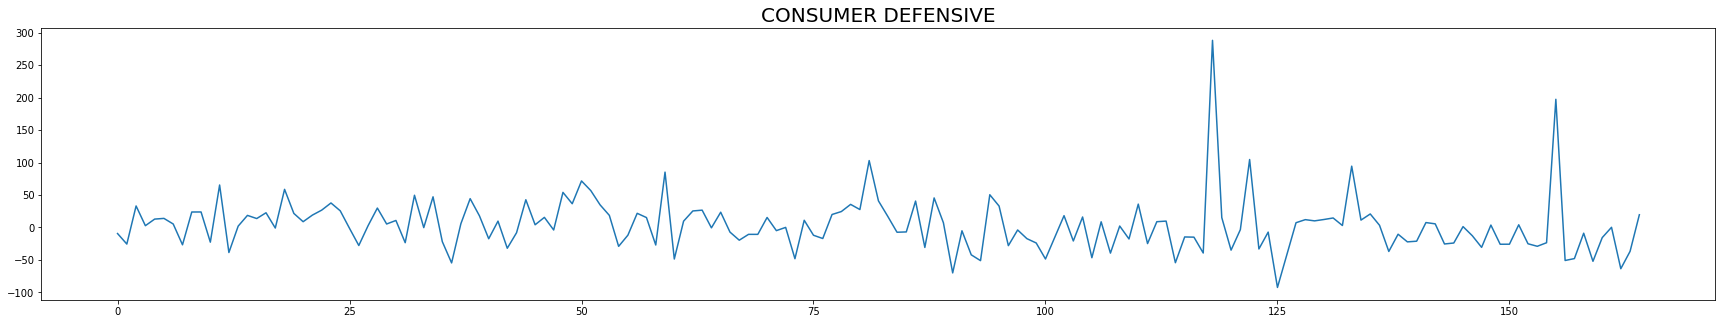

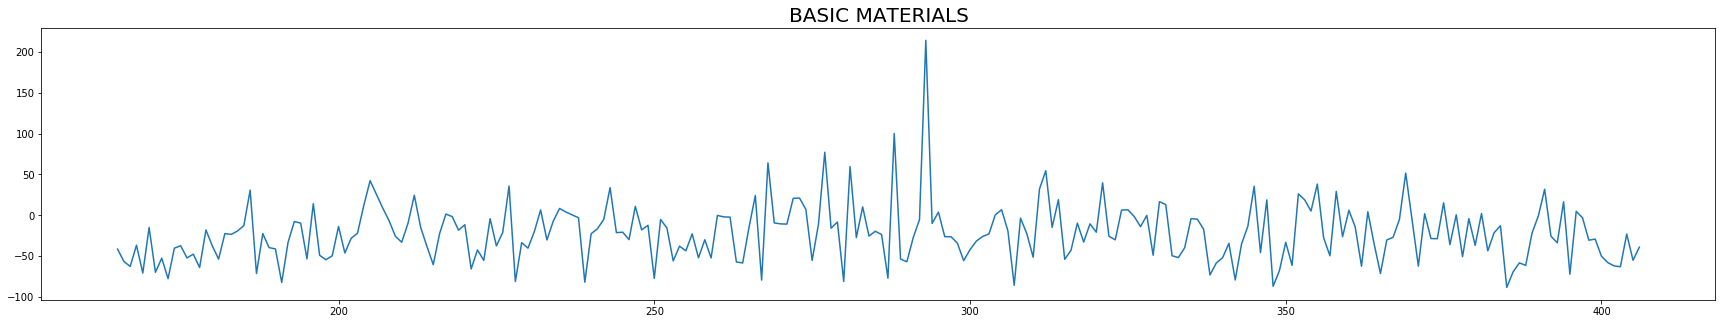

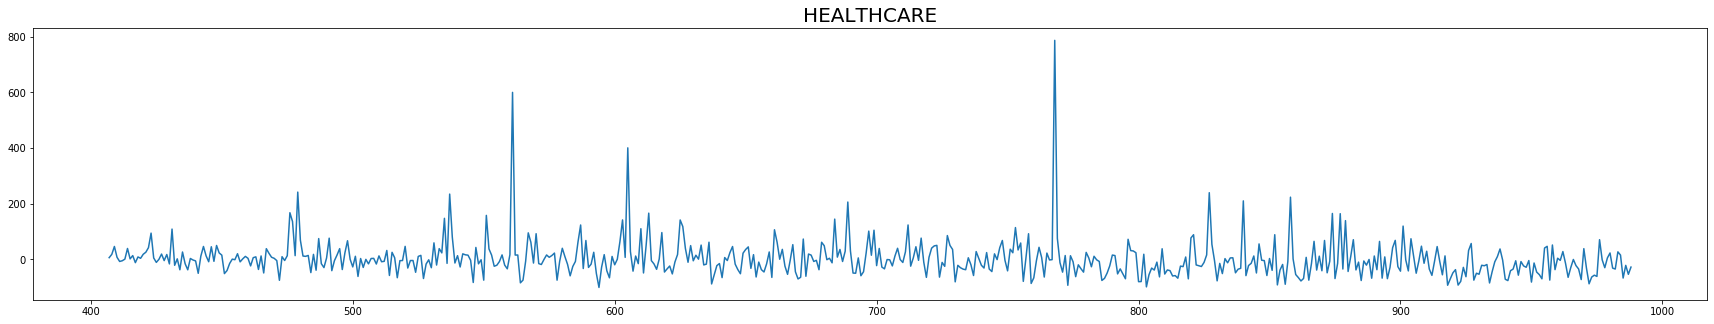

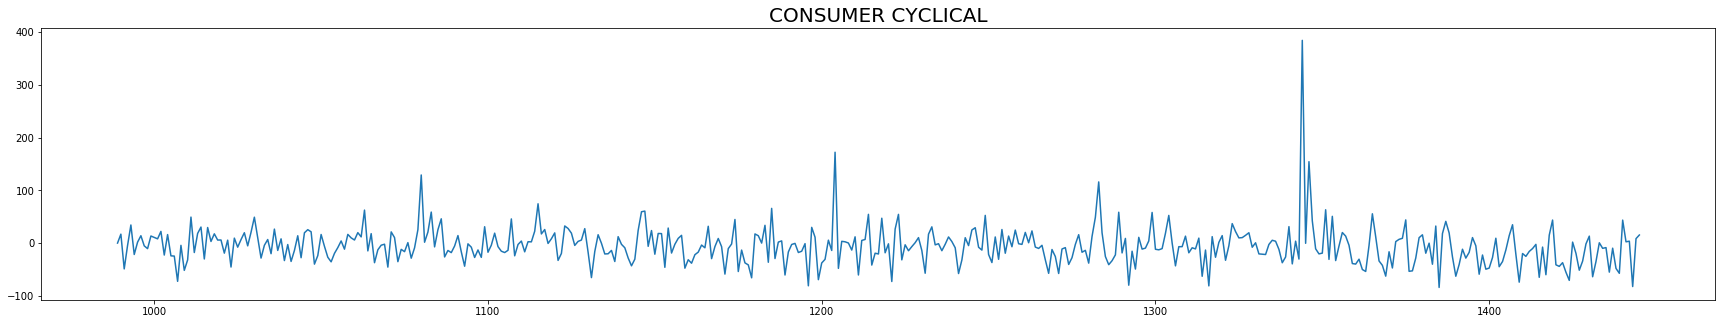

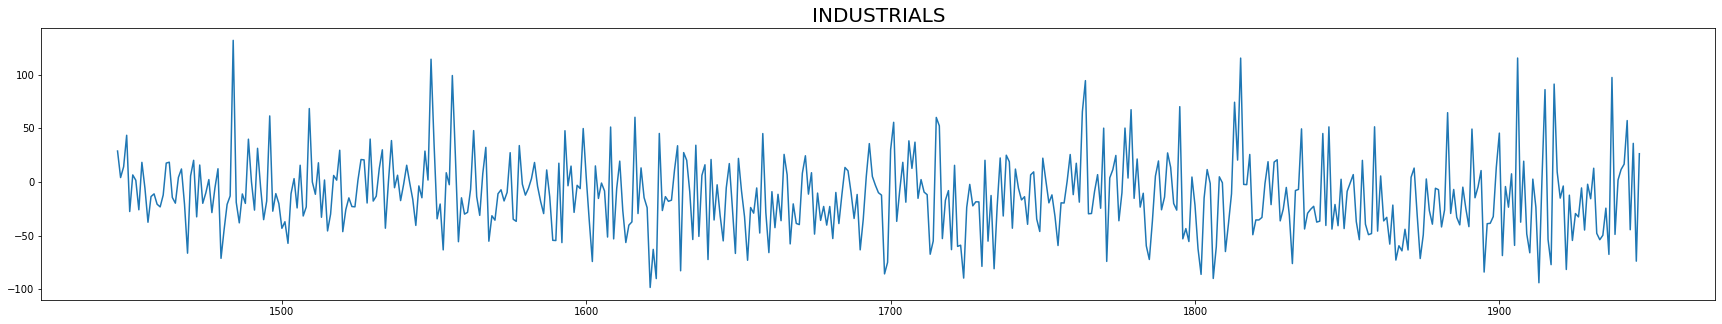

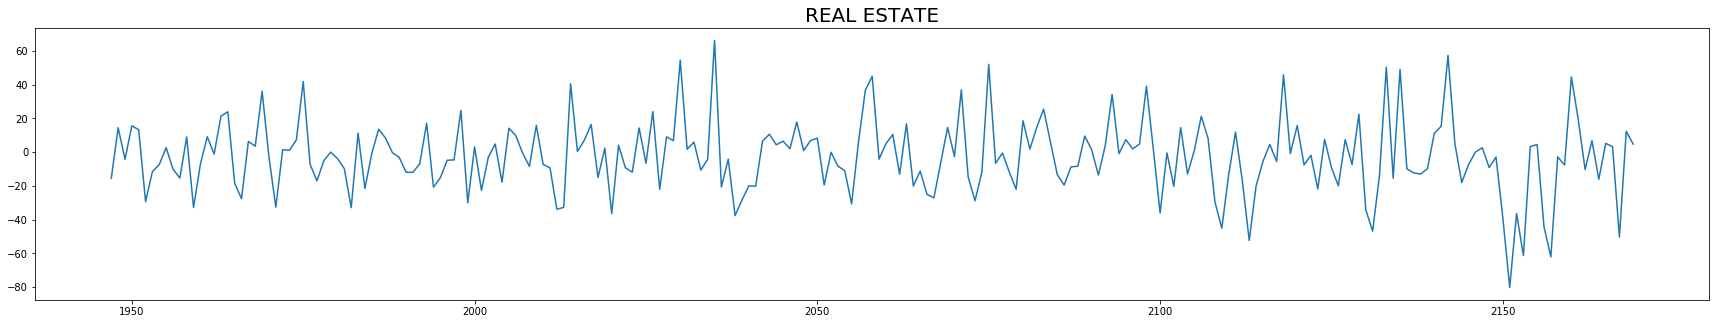

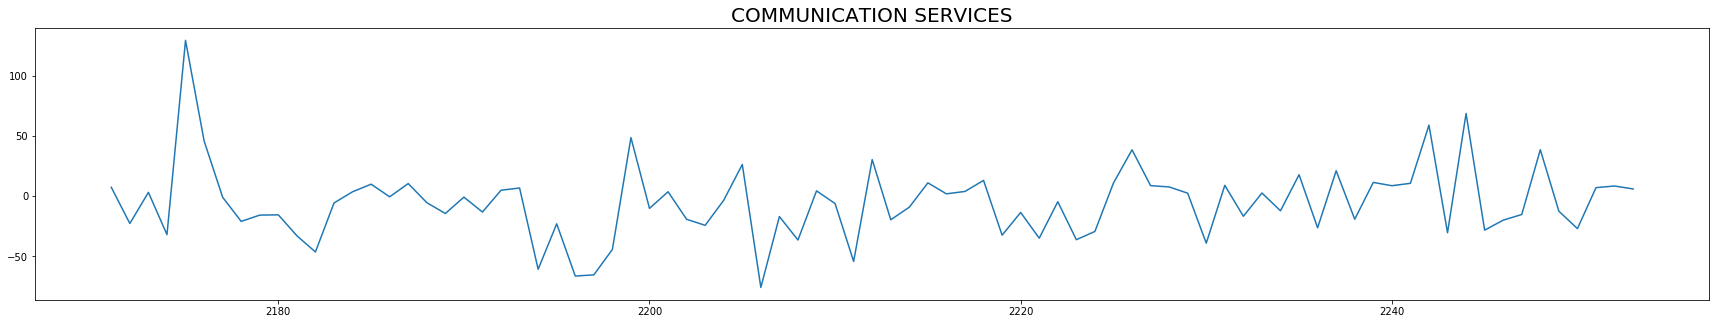

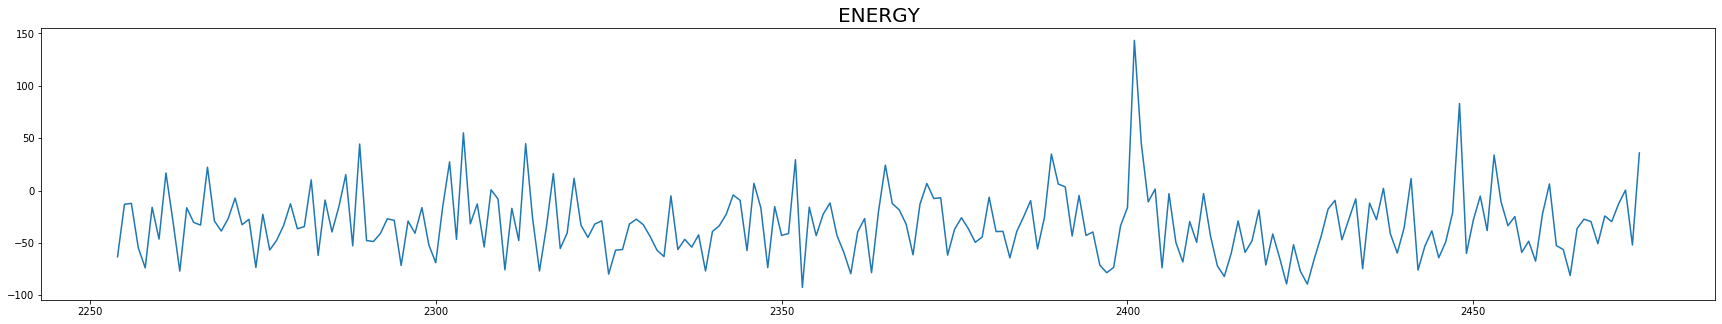

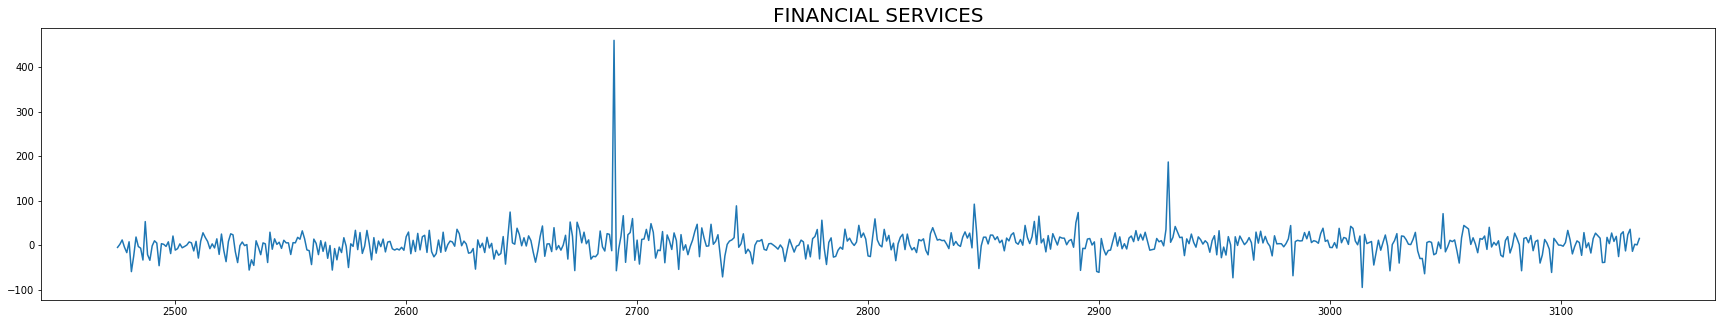

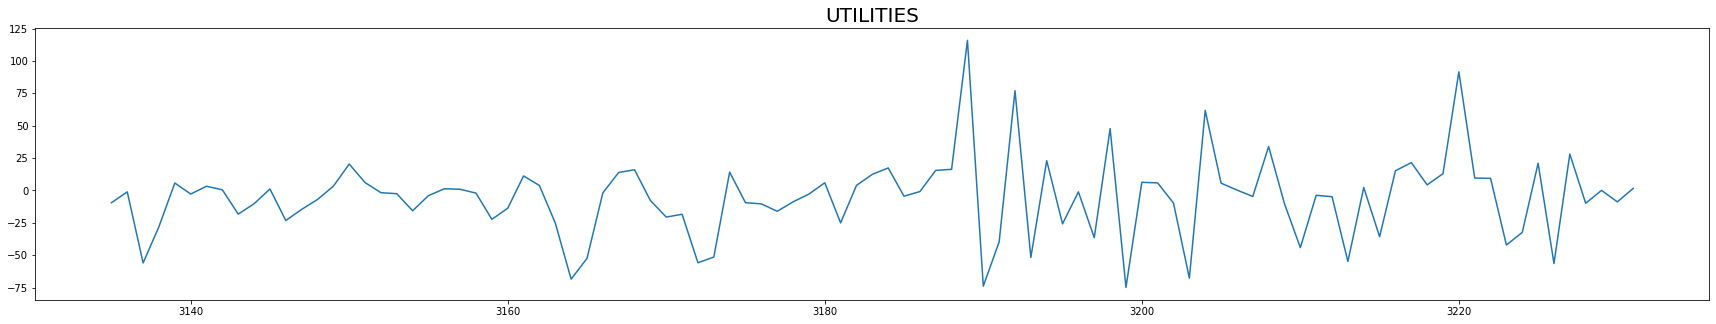

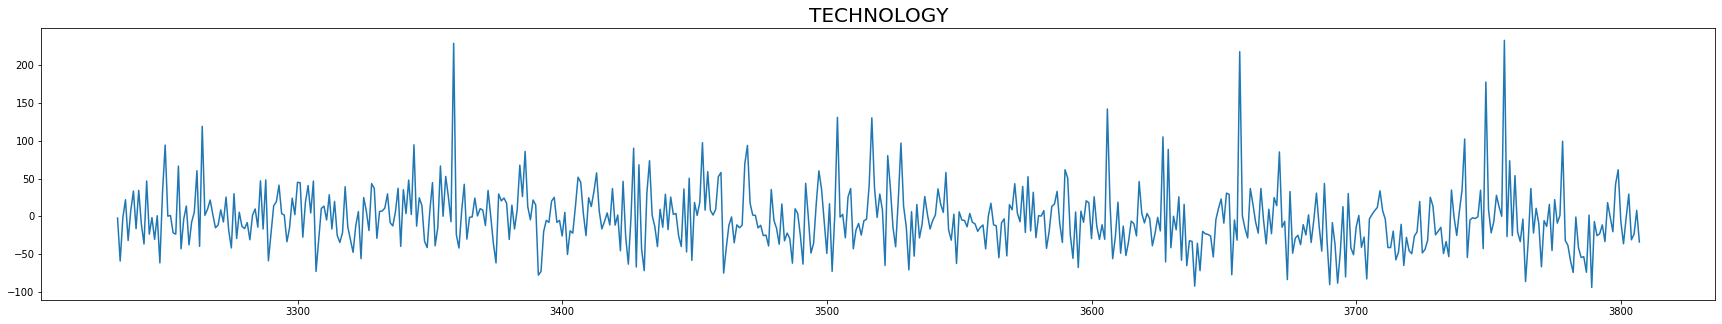

In [10]:
# Check again for gain-outliers
df_ = df.loc[:, ['Sector', '2015 PRICE VAR [%]']]
sector_list = df_['Sector'].unique()

for sector in sector_list:
    
    temp = df_[df_['Sector'] == sector] # get all data for one sector

    plt.figure(figsize=(30,5))
    plt.plot(temp['2015 PRICE VAR [%]'])
    plt.title(sector.upper(), fontsize=20)
    plt.show()

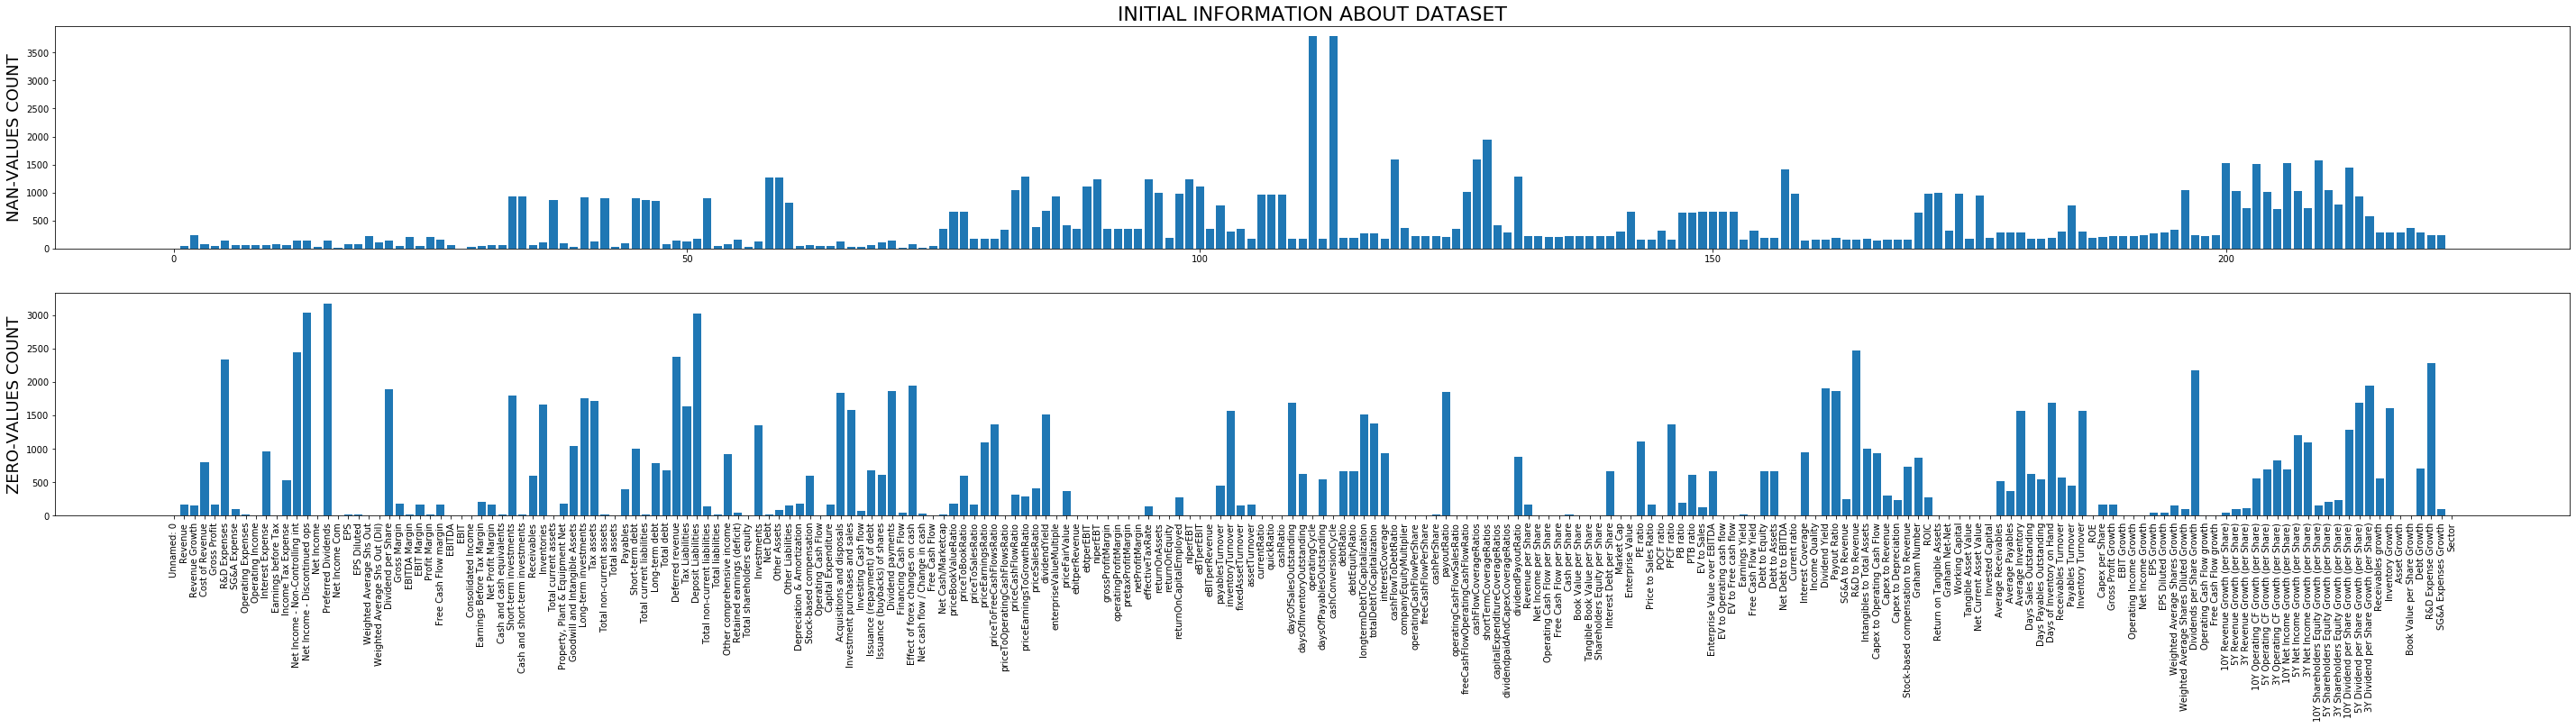

In [11]:
# Drop columns relative to classification, we will use them later
class_data = df.loc[:, ['Class', '2015 PRICE VAR [%]']]
df.drop(['Class', '2015 PRICE VAR [%]'], inplace=True, axis=1)

# Plot initial status of data quality in terms of nan-values and zero-values
nan_vals = df.isna().sum()
zero_vals = df.isin([0]).sum()
ind = np.arange(df.shape[1])

plt.figure(figsize=(50,10))

plt.subplot(2,1,1)
plt.title('INITIAL INFORMATION ABOUT DATASET', fontsize=22)
plt.bar(ind, nan_vals.values.tolist())
plt.ylabel('NAN-VALUES COUNT', fontsize=18)

plt.subplot(2,1,2)
plt.bar(ind, zero_vals.values.tolist())
plt.ylabel('ZERO-VALUES COUNT', fontsize=18)
plt.xticks(ind, nan_vals.index.values, rotation='90')

plt.show()

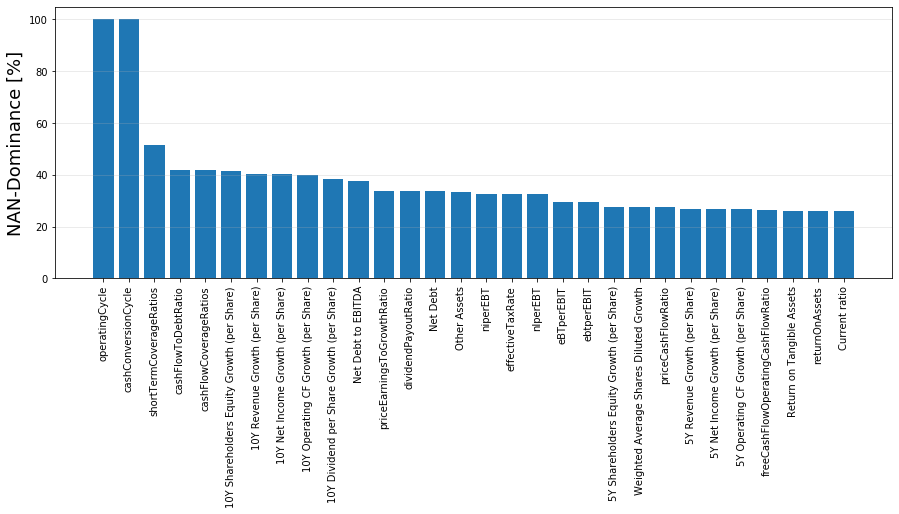

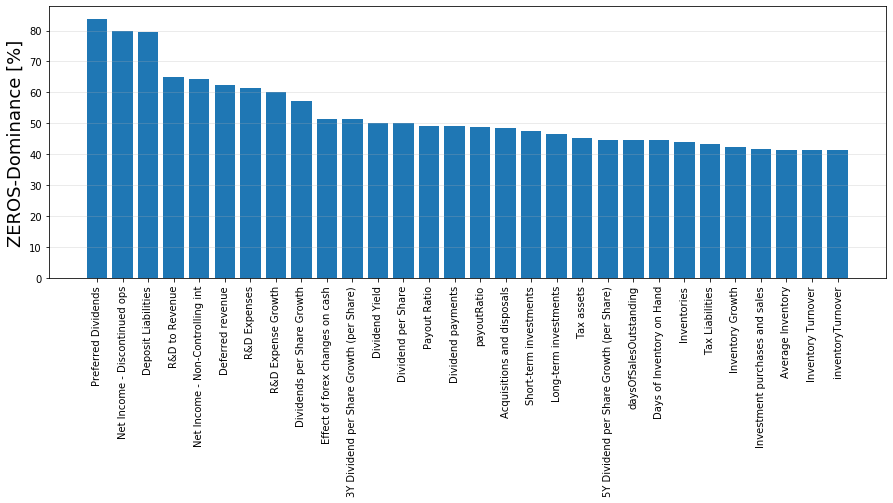

In [12]:
# Find count and percent of nan-values, zero-values
total_nans = df.isnull().sum().sort_values(ascending=False)
percent_nans = (df.isnull().sum()/df.isnull().count() * 100).sort_values(ascending=False)
total_zeros = df.isin([0]).sum().sort_values(ascending=False)
percent_zeros = (df.isin([0]).sum()/df.isin([0]).count() * 100).sort_values(ascending=False)
df_nans = pd.concat([total_nans, percent_nans], axis=1, keys=['Total NaN', 'Percent NaN'])
df_zeros = pd.concat([total_zeros, percent_zeros], axis=1, keys=['Total Zeros', 'Percent Zeros'])

# Graphical representation
plt.figure(figsize=(15,5))
plt.bar(np.arange(30), df_nans['Percent NaN'].iloc[:30].values.tolist())
plt.xticks(np.arange(30), df_nans['Percent NaN'].iloc[:30].index.values.tolist(), rotation='90')
plt.ylabel('NAN-Dominance [%]', fontsize=18)
plt.grid(alpha=0.3, axis='y')
plt.show()

plt.figure(figsize=(15,5))
plt.bar(np.arange(30), df_zeros['Percent Zeros'].iloc[:30].values.tolist())
plt.xticks(np.arange(30), df_zeros['Percent Zeros'].iloc[:30].index.values.tolist(), rotation='90')
plt.ylabel('ZEROS-Dominance [%]', fontsize=18)
plt.grid(alpha=0.3, axis='y')
plt.show()

In [13]:
# Find reasonable threshold for nan-values situation
test_nan_level = 0.5
print(df_nans.quantile(test_nan_level))
_, thresh_nan = df_nans.quantile(test_nan_level)

# Find reasonable threshold for zero-values situation
test_zeros_level = 0.6
print(df_zeros.quantile(test_zeros_level))
_, thresh_zeros = df_zeros.quantile(test_zeros_level)

Total NaN      226.000000
Percent NaN      5.966209
Name: 0.5, dtype: float64
Total Zeros      277.000000
Percent Zeros      7.312566
Name: 0.6, dtype: float64


In [14]:
# Clean dataset applying thresholds for both zero values, nan-values
print(f'INITIAL NUMBER OF VARIABLES: {df.shape[1]}')
print()

df_test1 = df.drop((df_nans[df_nans['Percent NaN'] > thresh_nan]).index, 1)
print(f'NUMBER OF VARIABLES AFTER NaN THRESHOLD {thresh_nan:.2f}%: {df_test1.shape[1]}')
print()

df_zeros_postnan = df_zeros.drop((df_nans[df_nans['Percent NaN'] > thresh_nan]).index, axis=0)
df_test2 = df_test1.drop((df_zeros_postnan[df_zeros_postnan['Percent Zeros'] > thresh_zeros]).index, 1)
print(f'NUMBER OF VARIABLES AFTER Zeros THRESHOLD {thresh_zeros:.2f}%: {df_test2.shape[1]}')


INITIAL NUMBER OF VARIABLES: 223

NUMBER OF VARIABLES AFTER NaN THRESHOLD 5.97%: 114

NUMBER OF VARIABLES AFTER Zeros THRESHOLD 7.31%: 63


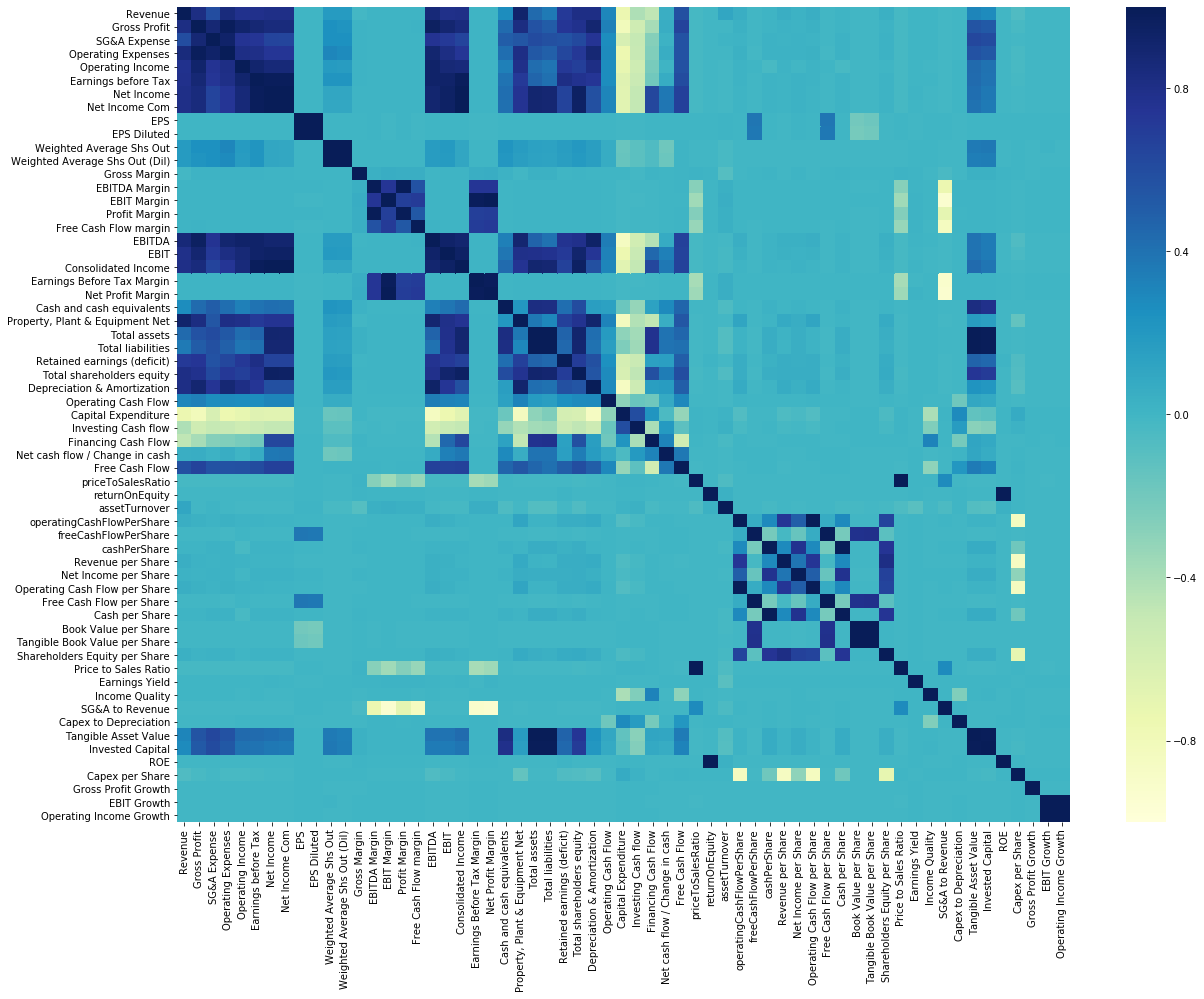

In [15]:
# Plot correlation matrix
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df_test2.corr(), annot=False, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.show()

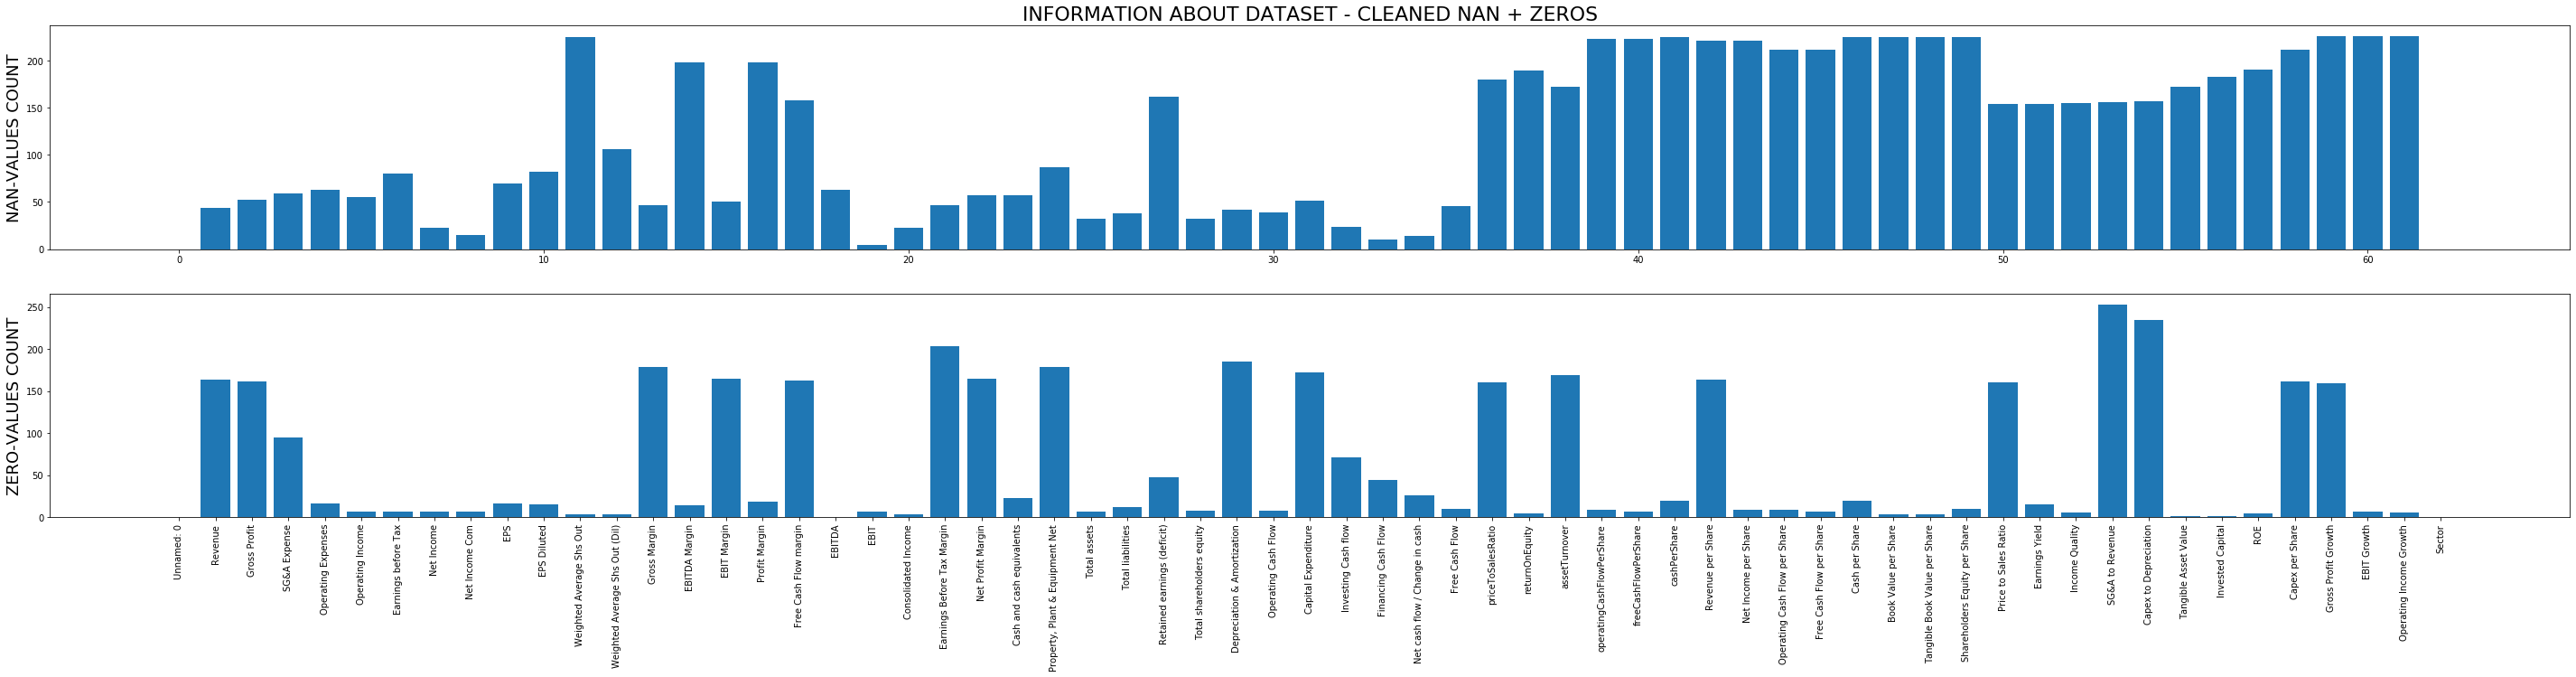

In [16]:
# New check on nan values
plt.figure(figsize=(50,10))

plt.subplot(2,1,1)
plt.title('INFORMATION ABOUT DATASET - CLEANED NAN + ZEROS', fontsize=22)
plt.bar(np.arange(df_test2.shape[1]), df_test2.isnull().sum())
plt.ylabel('NAN-VALUES COUNT', fontsize=18)

plt.subplot(2,1,2)
plt.bar(np.arange(df_test2.shape[1]), df_test2.isin([0]).sum())
plt.ylabel('ZERO-VALUES COUNT', fontsize=18)
plt.xticks(np.arange(df_test2.shape[1]), df_test2.columns.values, rotation='90')

plt.show()

In [17]:
# Analyze dataframe
df_test2.describe()

,Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Earnings before Tax,Net Income,Net Income Com,EPS,EPS Diluted,...,Income Quality,SG&A to Revenue,Capex to Depreciation,Tangible Asset Value,Invested Capital,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth
count,3.744000e+03,3.736000e+03,3.729000e+03,3.725000e+03,3.733000e+03,3.708000e+03,3.765000e+03,3.773000e+03,3.718000e+03,3.706000e+03,...,3633.000000,3632.000000,3631.000000,3.616000e+03,3.605000e+03,3.597000e+03,3.576000e+03,3562.000000,3562.000000,3562.000000
mean,5.907258e+09,2.198856e+09,9.351015e+08,1.444955e+09,6.782507e+08,5.755311e+08,4.919235e+08,4.863643e+08,-2.619988e+04,-2.666363e+04,...,2.436774,2.010552,-0.434208,1.765034e+10,1.943243e+10,1.951294e+03,-1.522512e+04,95.737643,3.650122,3.872690
std,3.911946e+10,1.162032e+10,4.833454e+09,7.324145e+09,3.796121e+09,2.800962e+09,4.408218e+09,4.403774e+09,1.676680e+06,1.677733e+06,...,55.154671,34.218508,660.081293,1.217026e+11,1.380249e+11,1.170282e+05,3.863478e+05,5642.676812,228.490653,227.593745
min,-6.276160e+08,-1.105000e+09,0.000000e+00,-1.088448e+09,-6.786000e+09,-8.878000e+09,-8.360000e+09,-8.360000e+09,-1.018709e+08,-1.018709e+08,...,-724.812500,-1.293500,-16522.069800,-2.101300e+09,-1.240000e+09,-7.101360e+01,-1.402752e+07,-48.793100,-1119.284200,-487.340900
25%,5.851275e+07,3.125250e+07,1.557000e+07,3.132300e+07,-1.211000e+06,-3.657236e+06,-3.654314e+06,-4.357820e+06,-2.300000e-01,-2.318000e-01,...,0.482600,0.092750,-1.667650,1.641032e+08,8.502888e+07,-2.060000e-02,-1.805825e+00,-0.010275,-0.268975,-0.253725
50%,4.409500e+08,1.915940e+08,7.459900e+07,1.389520e+08,4.232300e+07,2.871000e+07,2.276500e+07,2.175600e+07,7.800000e-01,7.658500e-01,...,1.257400,0.222650,-0.918300,8.515255e+08,7.897350e+08,7.800000e-02,-4.848500e-01,0.072200,0.065950,0.061200
75%,2.402177e+09,9.014335e+08,3.519930e+08,5.914230e+08,2.744000e+08,2.208995e+08,1.672160e+08,1.639940e+08,2.030000e+00,2.000000e+00,...,2.105900,0.459875,-0.448800,3.905753e+09,4.200100e+09,1.531000e-01,-9.762500e-02,0.225175,0.404500,0.353200
max,1.824698e+12,4.621600e+11,1.856830e+11,3.056050e+11,1.565540e+11,8.720500e+10,2.339970e+11,2.339970e+11,8.028004e+06,6.624003e+06,...,2086.250000,1540.600000,35298.333300,2.515999e+12,3.052798e+12,7.018763e+06,1.255873e+06,336767.800000,13562.153200,13545.338700


In [18]:
# Cut outliers
top_quantiles = df_test2.quantile(0.97)
outliers_top = (df_test2 > top_quantiles)

low_quantiles = df_test2.quantile(0.03)
outliers_low = (df_test2 < low_quantiles)

df_test2 = df_test2.mask(outliers_top, top_quantiles, axis=1)
df_test2 = df_test2.mask(outliers_low, low_quantiles, axis=1)

# Take a look at the dataframe post-outliers cut
df_test2.describe()

,Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Earnings before Tax,Net Income,Net Income Com,EPS,EPS Diluted,...,Income Quality,SG&A to Revenue,Capex to Depreciation,Tangible Asset Value,Invested Capital,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth
count,3.744000e+03,3.736000e+03,3.729000e+03,3.725000e+03,3.733000e+03,3.708000e+03,3.765000e+03,3.773000e+03,3718.000000,3706.000000,...,3633.000000,3632.000000,3631.000000,3.616000e+03,3.605000e+03,3597.000000,3576.000000,3562.000000,3562.000000,3562.000000
mean,3.650484e+09,1.385894e+09,5.740564e+08,9.157291e+08,4.306523e+08,3.730722e+08,2.765933e+08,2.723251e+08,0.322835,0.279510,...,1.288397,0.403150,-1.465255,6.782008e+09,7.158902e+09,0.009720,-2.684067,0.187734,0.082145,0.040824
std,8.339156e+09,3.209243e+09,1.365563e+09,2.146503e+09,1.016796e+09,9.118416e+08,6.888241e+08,6.817184e+08,4.298544,4.312201,...,2.738418,0.638914,1.822008,1.663266e+10,1.749584e+10,0.365618,6.271008,0.505787,1.327980,1.208158
min,0.000000e+00,0.000000e+00,8.214736e+05,3.914738e+06,-9.783660e+07,-1.361729e+08,-1.420718e+08,-1.472978e+08,-17.596000,-17.740000,...,-6.915212,0.000000,-8.701190,9.878711e+06,-1.963800e+06,-1.278180,-31.925550,-0.579278,-3.684956,-3.754263
25%,5.851275e+07,3.125250e+07,1.557000e+07,3.132300e+07,-1.211000e+06,-3.657236e+06,-3.654314e+06,-4.357820e+06,-0.230000,-0.231800,...,0.482600,0.092750,-1.667650,1.641032e+08,8.502888e+07,-0.020600,-1.805825,-0.010275,-0.268975,-0.253725
50%,4.409500e+08,1.915940e+08,7.459900e+07,1.389520e+08,4.232300e+07,2.871000e+07,2.276500e+07,2.175600e+07,0.780000,0.765850,...,1.257400,0.222650,-0.918300,8.515255e+08,7.897350e+08,0.078000,-0.484850,0.072200,0.065950,0.061200
75%,2.402177e+09,9.014335e+08,3.519930e+08,5.914230e+08,2.744000e+08,2.208995e+08,1.672160e+08,1.639940e+08,2.030000,2.000000,...,2.105900,0.459875,-0.448800,3.905753e+09,4.200100e+09,0.153100,-0.097625,0.225175,0.404500,0.353200
max,3.991236e+10,1.537495e+10,6.623942e+09,1.052921e+10,4.701240e+09,4.176913e+09,3.165899e+09,3.126310e+09,7.464900,7.317000,...,9.176300,3.407325,0.000000,8.235325e+10,8.568560e+10,0.760068,0.000000,2.245708,4.226564,3.563666


In [19]:
# Replace nan-values with mean value of column, considering each sector individually.
df_test2 = df_test2.groupby(['Sector']).transform(lambda x: x.fillna(x.mean()))

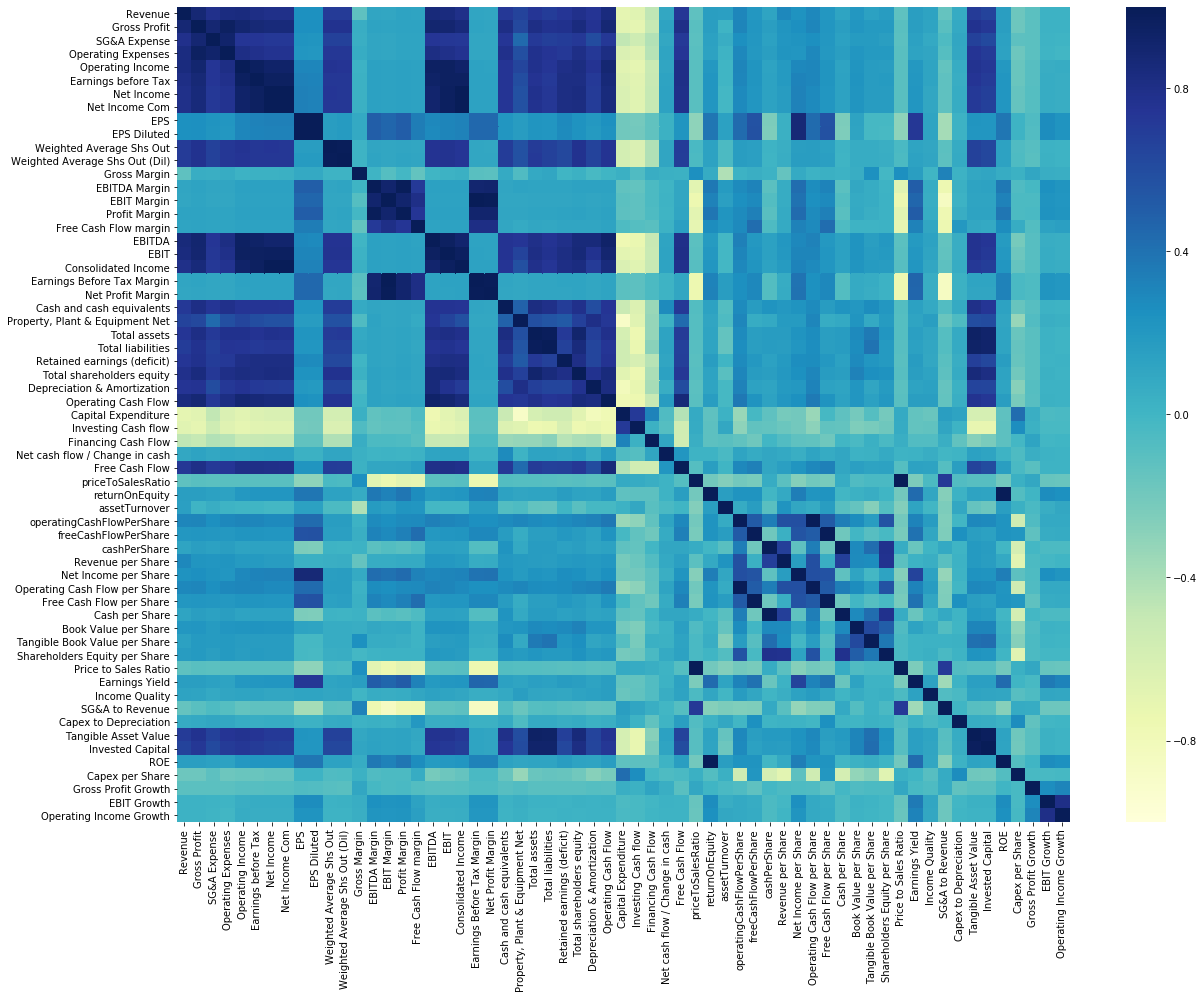

In [20]:
# Plot correlation matrix of output dataset
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df_test2.corr(), annot=False, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.show()

In [21]:
# Add the sector column
df_out = df_test2.join(df['Sector'])

# Add back the classification columns
df_out = df_out.join(class_data)

# Print information about dataset
df_out.info()
df_out.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3788 entries, 0 to 3807
Data columns (total 64 columns):
Revenue                            3788 non-null float64
Gross Profit                       3788 non-null float64
SG&A Expense                       3788 non-null float64
Operating Expenses                 3788 non-null float64
Operating Income                   3788 non-null float64
Earnings before Tax                3788 non-null float64
Net Income                         3788 non-null float64
Net Income Com                     3788 non-null float64
EPS                                3788 non-null float64
EPS Diluted                        3788 non-null float64
Weighted Average Shs Out           3788 non-null float64
Weighted Average Shs Out (Dil)     3788 non-null float64
Gross Margin                       3788 non-null float64
EBITDA Margin                      3788 non-null float64
EBIT Margin                        3788 non-null float64
Profit Margin                      378

,Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Earnings before Tax,Net Income,Net Income Com,EPS,EPS Diluted,...,Capex to Depreciation,Tangible Asset Value,Invested Capital,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Class,2015 PRICE VAR [%]
count,3.788000e+03,3.788000e+03,3.788000e+03,3.788000e+03,3.788000e+03,3.788000e+03,3.788000e+03,3.788000e+03,3788.000000,3788.000000,...,3788.000000,3.788000e+03,3.788000e+03,3788.000000,3788.000000,3788.000000,3788.000000,3788.000000,3788.000000,3788.000000
mean,3.648115e+09,1.389658e+09,5.766846e+08,9.188108e+08,4.329905e+08,3.756079e+08,2.768727e+08,2.725007e+08,0.332489,0.293032,...,-1.466249,6.906007e+09,7.292467e+09,0.011194,-2.714556,0.187490,0.084650,0.042740,0.426082,-5.025833
std,8.291999e+09,3.188785e+09,1.355676e+09,2.129961e+09,1.009899e+09,9.028585e+08,6.868300e+08,6.804401e+08,4.263439,4.270764,...,1.788217,1.630326e+10,1.713097e+10,0.356904,6.127946,0.490810,1.288785,1.172515,0.494571,43.177991
min,0.000000e+00,0.000000e+00,8.214736e+05,3.914738e+06,-9.783660e+07,-1.361729e+08,-1.420718e+08,-1.472978e+08,-17.596000,-17.740000,...,-8.701190,9.878711e+06,-1.963800e+06,-1.278180,-31.925550,-0.579278,-3.684956,-3.754263,0.000000,-100.397220
25%,5.986850e+07,3.201302e+07,1.584700e+07,3.197000e+07,-8.549083e+05,-2.975058e+06,-3.441750e+06,-4.262561e+06,-0.210000,-0.210000,...,-1.656850,1.815445e+08,1.017131e+08,-0.016925,-2.031800,-0.003825,-0.249650,-0.231325,0.000000,-28.657993
50%,4.640207e+08,2.014670e+08,7.813200e+07,1.453505e+08,4.522200e+07,3.185500e+07,2.341350e+07,2.208150e+07,0.790000,0.775000,...,-0.961650,9.884395e+08,9.339170e+08,0.079100,-0.558450,0.082650,0.078600,0.068550,0.000000,-5.518745
75%,2.517900e+09,9.439630e+08,3.813361e+08,6.215332e+08,2.938022e+08,2.468812e+08,1.720000e+08,1.663710e+08,2.010000,1.972500,...,-0.465875,4.559991e+09,5.008099e+09,0.145075,-0.114750,0.227500,0.375425,0.319350,1.000000,12.993969
max,3.991236e+10,1.537495e+10,6.623942e+09,1.052921e+10,4.701240e+09,4.176913e+09,3.165899e+09,3.126310e+09,7.464900,7.317000,...,0.000000,8.235325e+10,8.568560e+10,0.760068,0.000000,2.245708,4.226564,3.563666,1.000000,786.486467


In [22]:
"""In this notebook, we explored the financial indicators for a list of stocks relative to 2014. After an initial investigation regarding general aspects of the dataset, we performed some data cleaning steps in order to improve the usability of the dataset."""

'In this notebook, we explored the financial indicators for a list of stocks relative to 2014. After an initial investigation regarding general aspects of the dataset, we performed some data cleaning steps in order to improve the usability of the dataset.'